# THỰC HÀNH 2: ẢNH KỸ THUẬT SỐ & MÀU

## 1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỄM ẢNH

In [44]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 524.2 kB/s eta 0:01:15
    --------------------------------------- 0.5/39.5 MB 524.2 kB/s eta 0:01:15
    --------------------------------------- 0.8/39.5 MB 682.1 kB/s eta 0:00:57
    --------------------------------------- 0.8/39.5 MB 682.1 kB/s eta 0:00:57
   - -------------------------------------- 1.0/39.5 MB 590.9 kB/s eta 0:01:06
   - -------------------------------------- 1.0/39.5 MB 590.9 kB/s eta 0:01:06
   - -------------------------------------- 1.0/39.5 MB 590.9 kB/s eta 0:01:06
   - ----


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1.1. Biến đổi cường độ ảnh (Image inverse transformation)


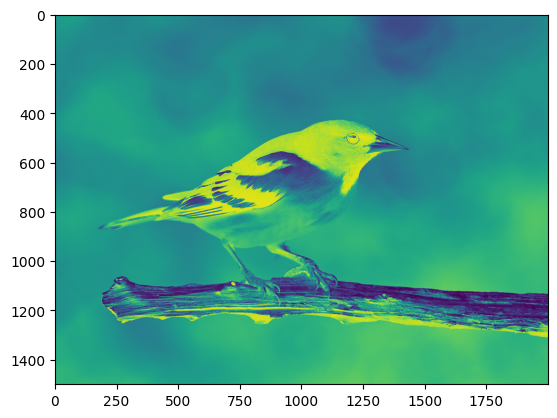

In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.array(img)

# inversion operation
im_2 = 255 - im_1

# convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img)
plt.show()

1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Correction)

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# invert gamma
gamma = 0.5

# convert ndarray from int to float
b1 = im_1.astype(float)
b2 = np.max(b1)

# b3 is gamma corrected
b3 = 255 * (b1 / b2) ** gamma

# c1 is converted to type int
c1 = np.asarray(b3)
new_img = Image.fromarray(c1)
img.show()
plt.show()

sau khi chuyển sang gamma = 5

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# invert gamma
gamma = 5

# convert ndarray from int to float
b1 = im_1.astype(float)
b2 = np.max(b1)

# b3 is gamma corrected
b3 = 255 * (b1 / b2) ** gamma

# c1 is converted to type int
c1 = np.asarray(b3)
new_img = Image.fromarray(c1)
img.show()
plt.show()

1.3. Thay đổi cường độ điểm ảnh với Log Transformation


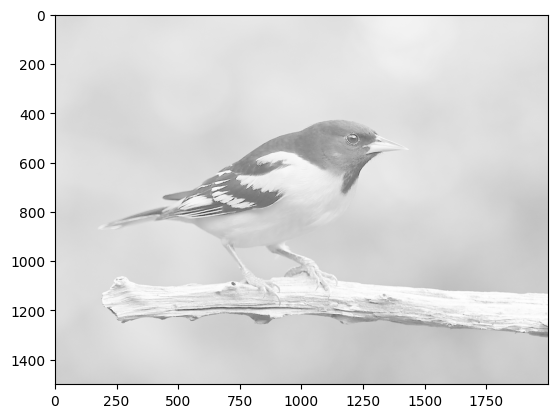

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open a grayscale image
img = Image.open('bird.png').convert('L')

# Convert image to ndarray
im_1 = np.asarray(img)

# Convert ndarray from int to float
b1 = im_1.astype(float)

# Find maximum value in b1
b2 = np.max(b1)

# Performing the log transformation
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# Scale c to the range [0, 255] and convert to uint8
c_scaled = np.clip(c, 0, 255)  # Ensure values are within the range
c1 = c_scaled.astype(np.uint8)

# Create the image from the array
d = Image.fromarray(c1)

# Show the original and transformed images
img.show()
d.show()
plt.imshow(d, cmap='gray')

plt.show()

1.4. Histogram equalization


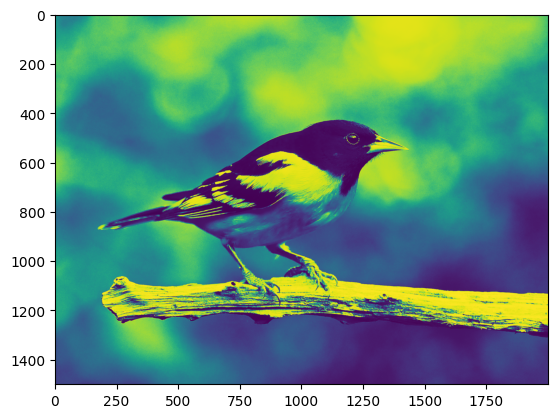

In [26]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

#convert 2D ndarray from 1D array
b1 = im1.flatten()

#histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

#cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[b1]

# im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape(im2, im1.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4)
plt.show()

1.5. Thay đổi ảnh với Contrast Stretching


0 255


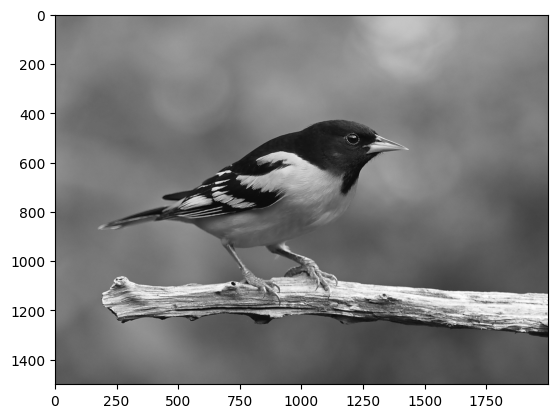

In [34]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a, b)

# converting im1 to float
c = im1.astype(float)

# contrast stretching transformation
im2 = 255 * (c - a)/(b - a)

#im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6. Biến đổi Fourier


1.6.1. Biến đổi ảnh với Fast Fourier


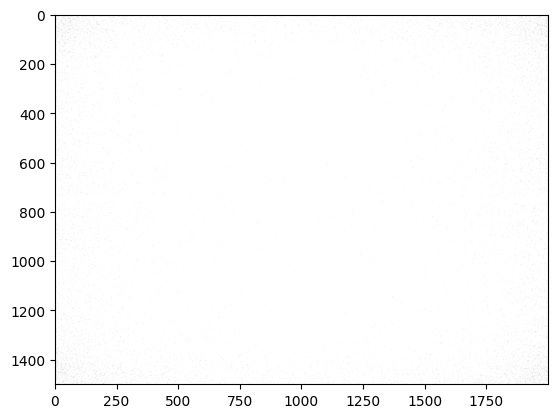

In [35]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
#im2 is converted from ndarray to image
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2. Lọc ảnh trong miền tần suất


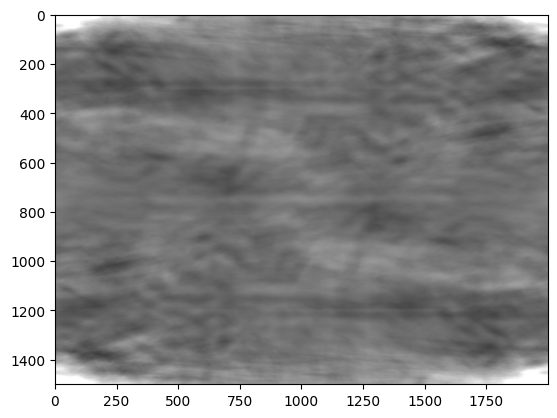

In [39]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function

M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        rl = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(rl)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t1)
# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

Butterworth highpass Filter


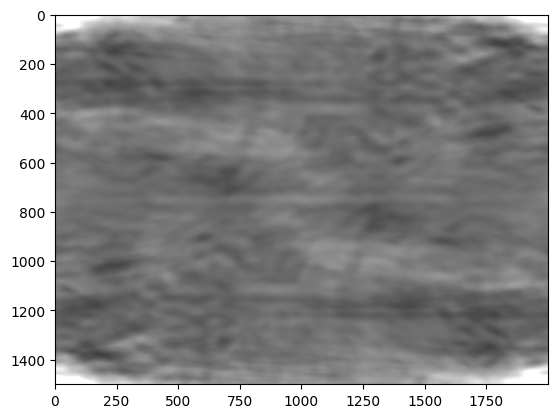

In [41]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M, N = d.shape[0], d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        rl = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(rl)
        # using cut-off radius to eliminate high frequency
        if r > d0:
            H[i, j] = 1/(1 + (r/d_0)**t2)
# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

## 2. BÀI TẬP 

### 1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như
### sau:
### - Image inverse transformation
### - Gamma-Correction
### - Log Transformation
### - Histogram equalization
### - Contrast Stretching
### Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các
### hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


In [1]:
import cv2
import numpy as np
import os

def load_images_from_folder(folder):
    """
    Tải tất cả ảnh từ một thư mục.
    """
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh xám
        if img is not None:
            images[filename] = img
            print(f"Đã tải: {filename}")
    return images

def save_image(image, filename, output_folder="output_images"):
    """
    Lưu ảnh đã biến đổi vào thư mục output_images.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    path = os.path.join(output_folder, filename)
    cv2.imwrite(path, image)
    print(f"Đã lưu: {path}")

def image_inverse_transformation(image):
    """
    Biến đổi nghịch đảo ảnh (âm bản).
    """
    return 255 - image

def gamma_correction(image, gamma=1.0):
    """
    Hiệu chỉnh Gamma.
    """
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

def log_transformation(image, c=1.0):
    """
    Biến đổi Log.
    """
    # Đảm bảo không có giá trị 0 trước khi log
    log_transformed = c * np.log(1 + image.astype(np.float32))
    return cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def histogram_equalization(image):
    """
    Cân bằng biểu đồ.
    """
    return cv2.equalizeHist(image)

def contrast_stretching(image, r1, s1, r2, s2):
    """
    Kéo giãn độ tương phản.
    """
    def pixel_transform(pixel):
        if 0 <= pixel <= r1:
            return (s1 / r1) * pixel
        elif r1 < pixel <= r2:
            return ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pixel - r2) + s2

    vectorized_transform = np.vectorize(pixel_transform)
    stretched_image = vectorized_transform(image)
    return stretched_image.astype(np.uint8)

def display_image(window_name, image):
    """
    Hiển thị ảnh.
    """
    cv2.imshow(window_name, image)

def main():
    folder_path = "exercise"  # Đảm bảo thư mục 'exercise' tồn tại và chứa ảnh
    output_folder = "output_images"

    # Tạo thư mục output nếu chưa có
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = load_images_from_folder(folder_path)

    if not images:
        print(f"Không tìm thấy ảnh nào trong thư mục '{folder_path}'. Vui lòng đảm bảo có ảnh trong thư mục này.")
        return

    while True:
        print("\n--- MENU BIẾN ĐỔI ẢNH ---")
        print("I: Image Inverse Transformation (Âm bản)")
        print("G: Gamma Correction")
        print("L: Log Transformation")
        print("H: Histogram Equalization (Cân bằng biểu đồ)")
        print("C: Contrast Stretching (Kéo giãn độ tương phản)")
        print("Q: Thoát chương trình")
        print("---------------------------")

        choice = input("Chọn phương pháp biến đổi (I, G, L, H, C, Q): ").upper()

        if choice == 'Q':
            print("Đang thoát chương trình...")
            break
        elif choice in ['I', 'G', 'L', 'H', 'C']:
            for filename, original_img in images.items():
                transformed_img = None
                output_filename = ""

                if choice == 'I':
                    transformed_img = image_inverse_transformation(original_img)
                    output_filename = f"inverse_{filename}"
                    print(f"Thực hiện biến đổi âm bản cho {filename}...")
                elif choice == 'G':
                    gamma_val = float(input(f"Nhập giá trị Gamma (ví dụ: 0.5, 2.0) cho {filename}: "))
                    transformed_img = gamma_correction(original_img, gamma=gamma_val)
                    output_filename = f"gamma_{gamma_val}_{filename}"
                    print(f"Thực hiện hiệu chỉnh Gamma cho {filename}...")
                elif choice == 'L':
                    c_val = float(input(f"Nhập giá trị C cho biến đổi Log (ví dụ: 30) cho {filename}: "))
                    transformed_img = log_transformation(original_img, c=c_val)
                    output_filename = f"log_{c_val}_{filename}"
                    print(f"Thực hiện biến đổi Log cho {filename}...")
                elif choice == 'H':
                    transformed_img = histogram_equalization(original_img)
                    output_filename = f"hist_eq_{filename}"
                    print(f"Thực hiện cân bằng biểu đồ cho {filename}...")
                elif choice == 'C':
                    r1 = int(input(f"Nhập giá trị r1 (0-255) cho {filename}: "))
                    s1 = int(input(f"Nhập giá trị s1 (0-255) cho {filename}: "))
                    r2 = int(input(f"Nhập giá trị r2 (0-255) cho {filename}: "))
                    s2 = int(input(f"Nhập giá trị s2 (0-255) cho {filename}: "))
                    transformed_img = contrast_stretching(original_img, r1, s1, r2, s2)
                    output_filename = f"contrast_stretch_{r1}_{s1}_{r2}_{s2}_{filename}"
                    print(f"Thực hiện kéo giãn độ tương phản cho {filename}...")

                if transformed_img is not None:
                    # Hiển thị ảnh gốc và ảnh đã biến đổi
                    display_image(f"Original - {filename}", original_img)
                    display_image(f"Transformed - {output_filename}", transformed_img)

                    # Lưu ảnh đã biến đổi
                    save_image(transformed_img, output_filename, output_folder)

            print("\nNhấn phím bất kỳ để đóng các cửa sổ ảnh và tiếp tục...")
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("Lựa chọn không hợp lệ. Vui lòng thử lại.")

if __name__ == "__main__":
    main()

Đã tải: ha-long-bay-in-vietnam.jpg
Đã tải: pagoda.jpg
Đã tải: quang_ninh.jpg

--- MENU BIẾN ĐỔI ẢNH ---
I: Image Inverse Transformation (Âm bản)
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization (Cân bằng biểu đồ)
C: Contrast Stretching (Kéo giãn độ tương phản)
Q: Thoát chương trình
---------------------------
Lựa chọn không hợp lệ. Vui lòng thử lại.

--- MENU BIẾN ĐỔI ẢNH ---
I: Image Inverse Transformation (Âm bản)
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization (Cân bằng biểu đồ)
C: Contrast Stretching (Kéo giãn độ tương phản)
Q: Thoát chương trình
---------------------------
Lựa chọn không hợp lệ. Vui lòng thử lại.

--- MENU BIẾN ĐỔI ẢNH ---
I: Image Inverse Transformation (Âm bản)
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization (Cân bằng biểu đồ)
C: Contrast Stretching (Kéo giãn độ tương phản)
Q: Thoát chương trình
---------------------------
Đang thoát chương trình...


### 2.Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như
### sau:
### - Fast Fourier
### - Butterworth Lowpass Filter
### - Butterworth Highpass Filter
### Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình
### trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    """
    Tải tất cả ảnh từ một thư mục.
    """
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Đọc ảnh xám. IMREAD_GRAYSCALE = 0
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images[filename] = img
            print(f"Đã tải: {filename}")
    return images

def save_image(image, filename, output_folder="output_images"):
    """
    Lưu ảnh đã biến đổi vào thư mục output_images.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    path = os.path.join(output_folder, filename)
    # Chuẩn hóa ảnh về 0-255 trước khi lưu nếu nó là float
    if image.dtype != np.uint8:
        image_to_save = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    else:
        image_to_save = image
    cv2.imwrite(path, image_to_save)
    print(f"Đã lưu: {path}")

def display_image(window_name, image):
    """
    Hiển thị ảnh.
    """
    # Chuẩn hóa ảnh về 0-255 trước khi hiển thị nếu nó là float
    if image.dtype != np.uint8:
        image_to_display = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    else:
        image_to_display = image
    cv2.imshow(window_name, image_to_display)

def fourier_transform(image):
    """
    Thực hiện biến đổi Fourier nhanh (FFT) và hiển thị phổ biên độ.
    """
    # Chuyển đổi ảnh sang kiểu float32
    f = np.fft.fft2(image.astype(np.float32))
    # Dịch chuyển tần số 0 về trung tâm
    fshift = np.fft.fftshift(f)
    # Tính phổ biên độ (magnitude spectrum)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-10) # Thêm epsilon để tránh log(0)

    # Để hiển thị, chuẩn hóa về 0-255
    magnitude_spectrum_display = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)
    return magnitude_spectrum_display.astype(np.uint8), fshift

def butterworth_filter(shape, D0, n, filter_type):
    """
    Tạo bộ lọc Butterworth.
    shape: Kích thước của bộ lọc (chiều cao, chiều rộng)
    D0: Tần số cắt
    n: Bậc của bộ lọc (order)
    filter_type: 'lowpass' hoặc 'highpass'
    """
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    # Tạo ma trận khoảng cách từ tâm
    for u in range(P):
        for v in range(Q):
            D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            if filter_type == 'lowpass':
                H[u, v] = 1 / (1 + (D_uv / D0)**(2 * n))
            elif filter_type == 'highpass':
                H[u, v] = 1 / (1 + (D0 / (D_uv + 1e-10))**(2 * n)) # Thêm epsilon để tránh chia cho 0
    return H

def apply_filter(image_dft_shifted, filter_mask):
    """
    Áp dụng bộ lọc trong miền tần số và biến đổi ngược về miền không gian.
    """
    # Áp dụng bộ lọc
    filtered_dft_shifted = image_dft_shifted * filter_mask
    # Dịch chuyển tần số 0 về lại vị trí ban đầu
    filtered_dft = np.fft.ifftshift(filtered_dft_shifted)
    # Biến đổi Fourier ngược
    filtered_image = np.fft.ifft2(filtered_dft)
    # Lấy phần thực và chuẩn hóa về 0-255
    filtered_image = np.abs(filtered_image)
    return cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def main():
    folder_path = "exercise"  # Đảm bảo thư mục 'exercise' tồn tại và chứa ảnh
    output_folder = "output_images"

    # Tạo thư mục output nếu chưa có
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = load_images_from_folder(folder_path)

    if not images:
        print(f"Không tìm thấy ảnh nào trong thư mục '{folder_path}'. Vui lòng đảm bảo có ảnh trong thư mục này.")
        return

    while True:
        print("\n--- MENU BIẾN ĐỔI ẢNH TRONG MIỀN TẦN SỐ ---")
        print("F: Fast Fourier Transform (Hiển thị phổ biên độ)")
        print("L: Butterworth Lowpass Filter (Lọc thông thấp)")
        print("H: Butterworth Highpass Filter (Lọc thông cao)")
        print("Q: Thoát chương trình")
        print("---------------------------------------------")

        choice = input("Chọn phương pháp biến đổi (F, L, H, Q): ").upper()

        if choice == 'Q':
            print("Đang thoát chương trình...")
            break
        elif choice in ['F', 'L', 'H']:
            for filename, original_img in images.items():
                transformed_img = None
                output_filename = ""
                dft_shifted = None # Để lưu trữ DFT đã dịch chuyển cho các bộ lọc

                # Thực hiện FFT trước nếu cần cho lọc
                if choice in ['L', 'H']:
                    print(f"Tính toán FFT cho {filename}...")
                    _, dft_shifted = fourier_transform(original_img)
                    # Lấy kích thước cho bộ lọc
                    rows, cols = original_img.shape

                if choice == 'F':
                    print(f"Thực hiện Fast Fourier Transform cho {filename}...")
                    # Khi chọn 'F', chúng ta muốn hiển thị phổ biên độ
                    magnitude_spectrum_img, _ = fourier_transform(original_img)
                    transformed_img = magnitude_spectrum_img
                    output_filename = f"fft_magnitude_{filename}"
                elif choice == 'L':
                    if dft_shifted is None: continue # Đảm bảo dft_shifted có giá trị
                    try:
                        D0_lp = float(input(f"Nhập tần số cắt D0 cho bộ lọc Lowpass (ví dụ: 30, 50) cho {filename}: "))
                        n_lp = int(input(f"Nhập bậc n cho bộ lọc Lowpass (ví dụ: 1, 2) cho {filename}: "))
                        lowpass_filter_mask = butterworth_filter((rows, cols), D0_lp, n_lp, 'lowpass')
                        transformed_img = apply_filter(dft_shifted, lowpass_filter_mask)
                        output_filename = f"butterworth_lowpass_D{int(D0_lp)}_n{n_lp}_{filename}"
                        print(f"Thực hiện lọc thông thấp Butterworth cho {filename}...")
                    except ValueError:
                        print("Giá trị nhập vào không hợp lệ. Vui lòng nhập số.")
                        continue
                elif choice == 'H':
                    if dft_shifted is None: continue # Đảm bảo dft_shifted có giá trị
                    try:
                        D0_hp = float(input(f"Nhập tần số cắt D0 cho bộ lọc Highpass (ví dụ: 30, 50) cho {filename}: "))
                        n_hp = int(input(f"Nhập bậc n cho bộ lọc Highpass (ví dụ: 1, 2) cho {filename}: "))
                        highpass_filter_mask = butterworth_filter((rows, cols), D0_hp, n_hp, 'highpass')
                        transformed_img = apply_filter(dft_shifted, highpass_filter_mask)
                        output_filename = f"butterworth_highpass_D{int(D0_hp)}_n{n_hp}_{filename}"
                        print(f"Thực hiện lọc thông cao Butterworth cho {filename}...")
                    except ValueError:
                        print("Giá trị nhập vào không hợp lệ. Vui lòng nhập số.")
                        continue

                if transformed_img is not None:
                    # Hiển thị ảnh gốc và ảnh đã biến đổi
                    display_image(f"Original - {filename}", original_img)
                    display_image(f"Transformed - {output_filename}", transformed_img)

                    # Lưu ảnh đã biến đổi
                    save_image(transformed_img, output_filename, output_folder)

            print("\nNhấn phím bất kỳ để đóng các cửa sổ ảnh và tiếp tục...")
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("Lựa chọn không hợp lệ. Vui lòng thử lại.")

if __name__ == "__main__":
    main()

Đã tải: ha-long-bay-in-vietnam.jpg
Đã tải: pagoda.jpg
Đã tải: quang_ninh.jpg

--- MENU BIẾN ĐỔI ẢNH TRONG MIỀN TẦN SỐ ---
F: Fast Fourier Transform (Hiển thị phổ biên độ)
L: Butterworth Lowpass Filter (Lọc thông thấp)
H: Butterworth Highpass Filter (Lọc thông cao)
Q: Thoát chương trình
---------------------------------------------
Tính toán FFT cho ha-long-bay-in-vietnam.jpg...
Giá trị nhập vào không hợp lệ. Vui lòng nhập số.
Tính toán FFT cho pagoda.jpg...
Giá trị nhập vào không hợp lệ. Vui lòng nhập số.
Tính toán FFT cho quang_ninh.jpg...
Giá trị nhập vào không hợp lệ. Vui lòng nhập số.

Nhấn phím bất kỳ để đóng các cửa sổ ảnh và tiếp tục...

--- MENU BIẾN ĐỔI ẢNH TRONG MIỀN TẦN SỐ ---
F: Fast Fourier Transform (Hiển thị phổ biên độ)
L: Butterworth Lowpass Filter (Lọc thông thấp)
H: Butterworth Highpass Filter (Lọc thông cao)
Q: Thoát chương trình
---------------------------------------------
Đang thoát chương trình...


### 3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.


In [1]:
import cv2
import numpy as np
import os
import random

# --- Các hàm biến đổi ảnh từ Câu 1 ---

def image_inverse_transformation(image):
    """
    Biến đổi nghịch đảo ảnh (âm bản).
    Áp dụng cho ảnh xám hoặc từng kênh của ảnh màu.
    """
    if len(image.shape) == 3: # Ảnh màu
        inverted_image = np.zeros_like(image)
        for i in range(3):
            inverted_image[:,:,i] = 255 - image[:,:,i]
        return inverted_image
    else: # Ảnh xám
        return 255 - image

def gamma_correction(image, gamma=1.0):
    """
    Hiệu chỉnh Gamma.
    Áp dụng cho ảnh xám hoặc từng kênh của ảnh màu.
    """
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")

    if len(image.shape) == 3: # Ảnh màu
        gamma_corrected_image = np.zeros_like(image)
        for i in range(3):
            gamma_corrected_image[:,:,i] = cv2.LUT(image[:,:,i], table)
        return gamma_corrected_image
    else: # Ảnh xám
        return cv2.LUT(image, table)

def log_transformation(image, c=1.0):
    """
    Biến đổi Log.
    Áp dụng cho ảnh xám hoặc từng kênh của ảnh màu.
    """
    # Đảm bảo không có giá trị 0 trước khi log
    if len(image.shape) == 3: # Ảnh màu
        log_transformed_image = np.zeros_like(image, dtype=np.uint8)
        for i in range(3):
            temp_channel = image[:,:,i].astype(np.float32)
            log_channel = c * np.log(1 + temp_channel)
            log_transformed_image[:,:,i] = cv2.normalize(log_channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        return log_transformed_image
    else: # Ảnh xám
        temp_image = image.astype(np.float32)
        log_transformed = c * np.log(1 + temp_image)
        return cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


def histogram_equalization(image):
    """
    Cân bằng biểu đồ.
    Nếu là ảnh màu, chuyển về YCbCr, cân bằng kênh Y, sau đó chuyển lại RGB.
    Nếu là ảnh xám, cân bằng trực tiếp.
    """
    if len(image.shape) == 3: # Ảnh màu
        img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb) # OpenCV đọc BGR
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        equalized_image = cv2.cvtColor(img_yuv, cv2.COLOR_YCrCb2BGR)
        return equalized_image
    else: # Ảnh xám
        return cv2.equalizeHist(image)

def contrast_stretching(image, r1=50, s1=0, r2=150, s2=255):
    """
    Kéo giãn độ tương phản.
    Áp dụng cho ảnh xám hoặc từng kênh của ảnh màu.
    Tham số mặc định để tránh lỗi khi chọn ngẫu nhiên.
    """
    def pixel_transform(pixel):
        if 0 <= pixel <= r1:
            return (s1 / r1) * pixel
        elif r1 < pixel <= r2:
            return ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pixel - r2) + s2

    # Vectorize the function for performance
    vectorized_transform = np.vectorize(pixel_transform)

    if len(image.shape) == 3: # Ảnh màu
        stretched_image = np.zeros_like(image)
        for i in range(3):
            stretched_image[:,:,i] = vectorized_transform(image[:,:,i])
        return stretched_image.astype(np.uint8)
    else: # Ảnh xám
        stretched_image = vectorized_transform(image)
        return stretched_image.astype(np.uint8)

# --- Các hàm hỗ trợ khác ---

def load_images_from_folder(folder):
    """
    Tải tất cả ảnh từ một thư mục, bao gồm cả ảnh màu.
    """
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Đọc ảnh màu (IMREAD_COLOR = 1), nếu không thành công thì thử đọc ảnh xám
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Thử đọc ảnh xám
        if img is not None:
            images[filename] = img
            print(f"Đã tải: {filename} (shape: {img.shape})")
        else:
            print(f"Không thể tải ảnh: {filename}")
    return images

def save_image(image, filename, output_folder="output_images"):
    """
    Lưu ảnh đã biến đổi vào thư mục output_images.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    path = os.path.join(output_folder, filename)
    cv2.imwrite(path, image)
    print(f"Đã lưu: {path}")

def display_image(window_name, image):
    """
    Hiển thị ảnh.
    """
    cv2.imshow(window_name, image)

def swap_rgb_channels(image):
    """
    Thay đổi thứ tự kênh màu RGB của ảnh một cách ngẫu nhiên.
    OpenCV đọc ảnh dưới dạng BGR.
    """
    if len(image.shape) < 3 or image.shape[2] != 3:
        print("Ảnh không phải ảnh màu RGB/BGR, không thể thay đổi thứ tự kênh.")
        return image

    channels = [image[:,:,0], image[:,:,1], image[:,:,2]] # B, G, R
    random.shuffle(channels) # Trộn ngẫu nhiên thứ tự các kênh

    # Ghép lại các kênh đã trộn
    shuffled_image = cv2.merge(channels)
    return shuffled_image

def main():
    folder_path = "exercise"  # Đảm bảo thư mục 'exercise' tồn tại và chứa ảnh
    output_folder = "output_images"

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = load_images_from_folder(folder_path)

    if not images:
        print(f"Không tìm thấy ảnh nào trong thư mục '{folder_path}'. Vui lòng đảm bảo có ảnh trong thư mục này.")
        return

    # Danh sách các phép biến đổi từ Câu 1
    transformations = {
        "Image Inverse Transformation": image_inverse_transformation,
        "Gamma Correction": gamma_correction,
        "Log Transformation": log_transformation,
        "Histogram Equalization": histogram_equalization,
        "Contrast Stretching": contrast_stretching,
    }

    # Chọn ngẫu nhiên một phép biến đổi từ danh sách
    chosen_transform_name = random.choice(list(transformations.keys()))
    chosen_transform_func = transformations[chosen_transform_name]
    print(f"\nĐã chọn ngẫu nhiên phép biến đổi: {chosen_transform_name}")

    for filename, original_img in images.items():
        print(f"\nĐang xử lý ảnh: {filename}")

        # 1. Thay đổi thứ tự màu RGB
        rgb_swapped_img = swap_rgb_channels(original_img.copy())
        display_image(f"Original - {filename}", original_img)
        display_image(f"RGB Swapped - {filename}", rgb_swapped_img)
        print(f"Đã thay đổi thứ tự kênh màu cho {filename}.")

        # 2. Áp dụng phép biến đổi đã chọn
        transformed_img = None
        output_filename_prefix = ""

        # Xử lý các phép biến đổi có tham số đặc biệt
        if chosen_transform_name == "Gamma Correction":
            gamma_val = random.uniform(0.5, 2.5) # Gamma ngẫu nhiên
            transformed_img = chosen_transform_func(rgb_swapped_img, gamma=gamma_val)
            output_filename_prefix = f"gamma{gamma_val:.2f}"
            print(f"Áp dụng Gamma Correction với gamma = {gamma_val:.2f}")
        elif chosen_transform_name == "Log Transformation":
            c_val = random.uniform(20, 80) # C ngẫu nhiên
            transformed_img = chosen_transform_func(rgb_swapped_img, c=c_val)
            output_filename_prefix = f"log{c_val:.0f}"
            print(f"Áp dụng Log Transformation với c = {c_val:.0f}")
        elif chosen_transform_name == "Contrast Stretching":
            # Tham số ngẫu nhiên cho Contrast Stretching, đảm bảo r1 < r2 và s1 < s2
            r1 = random.randint(0, 100)
            r2 = random.randint(150, 255)
            s1 = random.randint(0, 50)
            s2 = random.randint(200, 255)
            transformed_img = chosen_transform_func(rgb_swapped_img, r1, s1, r2, s2)
            output_filename_prefix = f"cs_r{r1}_{s1}_r{r2}_{s2}"
            print(f"Áp dụng Contrast Stretching với (r1,s1,r2,s2) = ({r1},{s1},{r2},{s2})")
        else:
            transformed_img = chosen_transform_func(rgb_swapped_img)
            output_filename_prefix = chosen_transform_name.replace(" ", "_").lower()


        if transformed_img is not None:
            # Hiển thị ảnh đã biến đổi cuối cùng
            display_image(f"Final Transformed ({chosen_transform_name}) - {filename}", transformed_img)

            # Lưu ảnh đã biến đổi
            base_name, ext = os.path.splitext(filename)
            output_filename = f"rgb_swapped_{output_filename_prefix}_{base_name}{ext}"
            save_image(transformed_img, output_filename, output_folder)

    print("\nQuá trình xử lý hoàn tất cho tất cả các ảnh.")
    print("Nhấn phím bất kỳ để đóng các cửa sổ ảnh.")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

Đã tải: ha-long-bay-in-vietnam.jpg (shape: (437, 700, 3))
Đã tải: pagoda.jpg (shape: (348, 600, 3))
Đã tải: quang_ninh.jpg (shape: (605, 1021, 3))

Đã chọn ngẫu nhiên phép biến đổi: Contrast Stretching

Đang xử lý ảnh: ha-long-bay-in-vietnam.jpg
Đã thay đổi thứ tự kênh màu cho ha-long-bay-in-vietnam.jpg.
Áp dụng Contrast Stretching với (r1,s1,r2,s2) = (36,49,176,201)
Đã lưu: output_images\rgb_swapped_cs_r36_49_r176_201_ha-long-bay-in-vietnam.jpg

Đang xử lý ảnh: pagoda.jpg
Đã thay đổi thứ tự kênh màu cho pagoda.jpg.
Áp dụng Contrast Stretching với (r1,s1,r2,s2) = (70,28,160,224)
Đã lưu: output_images\rgb_swapped_cs_r70_28_r160_224_pagoda.jpg

Đang xử lý ảnh: quang_ninh.jpg
Đã thay đổi thứ tự kênh màu cho quang_ninh.jpg.
Áp dụng Contrast Stretching với (r1,s1,r2,s2) = (33,18,174,219)
Đã lưu: output_images\rgb_swapped_cs_r33_18_r174_219_quang_ninh.jpg

Quá trình xử lý hoàn tất cho tất cả các ảnh.
Nhấn phím bất kỳ để đóng các cửa sổ ảnh.


### 4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫunhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép ButterworthLowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.


In [2]:
import cv2
import numpy as np
import os
import random

# --- Các hàm biến đổi ảnh từ Câu 2 (Miền tần số) ---

def fourier_transform_and_get_dft(image):
    """
    Thực hiện biến đổi Fourier nhanh (FFT) và trả về phổ đã dịch chuyển.
    """
    # Chuyển đổi ảnh sang kiểu float32
    f = np.fft.fft2(image.astype(np.float32))
    # Dịch chuyển tần số 0 về trung tâm
    fshift = np.fft.fftshift(f)
    return fshift

def butterworth_filter_mask(shape, D0, n, filter_type):
    """
    Tạo bộ lọc Butterworth.
    shape: Kích thước của bộ lọc (chiều cao, chiều rộng)
    D0: Tần số cắt
    n: Bậc của bộ lọc (order)
    filter_type: 'lowpass' hoặc 'highpass'
    """
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    # Tạo ma trận khoảng cách từ tâm
    for u in range(P):
        for v in range(Q):
            D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            if filter_type == 'lowpass':
                H[u, v] = 1 / (1 + (D_uv / D0)**(2 * n))
            elif filter_type == 'highpass':
                H[u, v] = 1 / (1 + (D0 / (D_uv + 1e-10))**(2 * n)) # Thêm epsilon để tránh chia cho 0
    return H

def apply_frequency_filter(image_dft_shifted, filter_mask):
    """
    Áp dụng bộ lọc trong miền tần số và biến đổi ngược về miền không gian.
    """
    # Áp dụng bộ lọc
    filtered_dft_shifted = image_dft_shifted * filter_mask
    # Dịch chuyển tần số 0 về lại vị trí ban đầu
    filtered_dft = np.fft.ifftshift(filtered_dft_shifted)
    # Biến đổi Fourier ngược
    filtered_image = np.fft.ifft2(filtered_dft)
    # Lấy phần thực và chuẩn hóa về 0-255
    filtered_image = np.abs(filtered_image)
    return cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# --- Các hàm lọc bổ sung (Min/Max Filter) ---

def min_filter(image, kernel_size=3):
    """
    Áp dụng bộ lọc Min (phép co/erosion).
    """
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

def max_filter(image, kernel_size=3):
    """
    Áp dụng bộ lọc Max (phép giãn/dilation).
    """
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

# --- Các hàm hỗ trợ chung ---

def load_images_from_folder(folder):
    """
    Tải tất cả ảnh từ một thư mục, bao gồm cả ảnh màu.
    """
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Đọc ảnh màu (IMREAD_COLOR = 1), nếu không thành công thì thử đọc ảnh xám
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Thử đọc ảnh xám
        if img is not None:
            images[filename] = img
            print(f"Đã tải: {filename} (shape: {img.shape})")
        else:
            print(f"Không thể tải ảnh: {filename}")
    return images

def save_image(image, filename, output_folder="output_images"):
    """
    Lưu ảnh đã biến đổi vào thư mục output_images.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    path = os.path.join(output_folder, filename)
    cv2.imwrite(path, image)
    print(f"Đã lưu: {path}")

def display_image(window_name, image):
    """
    Hiển thị ảnh.
    """
    cv2.imshow(window_name, image)

def swap_rgb_channels(image):
    """
    Thay đổi thứ tự kênh màu RGB của ảnh một cách ngẫu nhiên.
    OpenCV đọc ảnh dưới dạng BGR.
    """
    if len(image.shape) < 3 or image.shape[2] != 3:
        print("Ảnh không phải ảnh màu RGB/BGR, không thể thay đổi thứ tự kênh.")
        return image

    channels = [image[:,:,0], image[:,:,1], image[:,:,2]] # B, G, R
    random.shuffle(channels) # Trộn ngẫu nhiên thứ tự các kênh

    # Ghép lại các kênh đã trộn
    shuffled_image = cv2.merge(channels)
    return shuffled_image

def main():
    folder_path = "exercise"
    output_folder = "output_images"

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = load_images_from_folder(folder_path)

    if not images:
        print(f"Không tìm thấy ảnh nào trong thư mục '{folder_path}'. Vui lòng đảm bảo có ảnh trong thư mục này.")
        return

    # Danh sách các phép biến đổi từ Câu 2
    transformations = {
        "Fast Fourier Transform": None, # FFT chỉ để lấy DFT, không phải biến đổi cuối cùng
        "Butterworth Lowpass Filter": "lowpass",
        "Butterworth Highpass Filter": "highpass",
    }

    # Chọn ngẫu nhiên một phép biến đổi từ danh sách
    chosen_transform_name = random.choice(list(transformations.keys()))
    transform_type = transformations[chosen_transform_name]

    print(f"\nĐã chọn ngẫu nhiên phép biến đổi chính: {chosen_transform_name}")

    for filename, original_img in images.items():
        print(f"\nĐang xử lý ảnh: {filename}")

        # 1. Thay đổi thứ tự màu RGB
        rgb_swapped_img = swap_rgb_channels(original_img.copy())
        display_image(f"Original - {filename}", original_img)
        display_image(f"RGB Swapped - {filename}", rgb_swapped_img)
        print(f"Đã thay đổi thứ tự kênh màu cho {filename}.")

        # 2. Chuẩn bị ảnh cho xử lý tần số (chuyển về ảnh xám nếu là ảnh màu)
        # Các bộ lọc tần số thường hoạt động tốt nhất trên ảnh xám
        # Nếu ảnh là màu, chúng ta sẽ chuyển nó sang ảnh xám trước khi FFT
        # và sau đó áp dụng phép biến đổi cho ảnh xám, sau đó gán lại vào ảnh màu
        is_color_image = (len(rgb_swapped_img.shape) == 3 and rgb_swapped_img.shape[2] == 3)
        img_for_fft = cv2.cvtColor(rgb_swapped_img, cv2.COLOR_BGR2GRAY) if is_color_image else rgb_swapped_img.copy()

        rows, cols = img_for_fft.shape
        dft_shifted = fourier_transform_and_get_dft(img_for_fft) # Lấy DFT đã dịch chuyển

        transformed_img_gray = None
        output_filename_prefix = ""

        if chosen_transform_name == "Fast Fourier Transform":
            # Nếu chọn FFT, hiển thị phổ biên độ của ảnh đã hoán đổi kênh (sau khi chuyển xám)
            magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1e-10)
            transformed_img_gray = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
            output_filename_prefix = "fft_magnitude"
            print(f"Hiển thị phổ biên độ cho {filename} (từ ảnh xám hóa).")
        elif transform_type == "lowpass":
            try:
                D0_lp = random.uniform(20, 80) # Tần số cắt ngẫu nhiên
                n_lp = random.randint(1, 3)    # Bậc ngẫu nhiên
                lowpass_filter_mask = butterworth_filter_mask((rows, cols), D0_lp, n_lp, 'lowpass')
                transformed_img_gray = apply_frequency_filter(dft_shifted, lowpass_filter_mask)
                output_filename_prefix = f"butterworth_lowpass_D{int(D0_lp)}_n{n_lp}"
                print(f"Áp dụng Butterworth Lowpass Filter (D0={int(D0_lp)}, n={n_lp}) cho {filename}.")

                # Thêm Min Filter
                kernel_size_min = random.randint(3, 7) # Kích thước kernel ngẫu nhiên
                transformed_img_gray = min_filter(transformed_img_gray, kernel_size=kernel_size_min)
                output_filename_prefix += f"_min_k{kernel_size_min}"
                print(f"Áp dụng thêm Min Filter (k={kernel_size_min}) cho {filename}.")
            except ValueError:
                print("Lỗi khi tạo tham số cho bộ lọc Lowpass.")
                continue
        elif transform_type == "highpass":
            try:
                D0_hp = random.uniform(20, 80) # Tần số cắt ngẫu nhiên
                n_hp = random.randint(1, 3)    # Bậc ngẫu nhiên
                highpass_filter_mask = butterworth_filter_mask((rows, cols), D0_hp, n_hp, 'highpass')
                transformed_img_gray = apply_frequency_filter(dft_shifted, highpass_filter_mask)
                output_filename_prefix = f"butterworth_highpass_D{int(D0_hp)}_n{n_hp}"
                print(f"Áp dụng Butterworth Highpass Filter (D0={int(D0_hp)}, n={n_hp}) cho {filename}.")

                # Thêm Max Filter
                kernel_size_max = random.randint(3, 7) # Kích thước kernel ngẫu nhiên
                transformed_img_gray = max_filter(transformed_img_gray, kernel_size=kernel_size_max)
                output_filename_prefix += f"_max_k{kernel_size_max}"
                print(f"Áp dụng thêm Max Filter (k={kernel_size_max}) cho {filename}.")
            except ValueError:
                print("Lỗi khi tạo tham số cho bộ lọc Highpass.")
                continue

        if transformed_img_gray is not None:
            # Nếu ảnh gốc là ảnh màu, chúng ta cần chuyển ảnh đã biến đổi (xám) trở lại ảnh màu
            # bằng cách nhân bản kênh xám thành 3 kênh RGB.
            final_transformed_img = transformed_img_gray
            if is_color_image and chosen_transform_name != "Fast Fourier Transform": # FFT là phổ nên luôn xám
                final_transformed_img = cv2.cvtColor(transformed_img_gray, cv2.COLOR_GRAY2BGR)


            # Hiển thị ảnh đã biến đổi cuối cùng
            display_image(f"Final Transformed ({chosen_transform_name}) - {filename}", final_transformed_img)

            # Lưu ảnh đã biến đổi
            base_name, ext = os.path.splitext(filename)
            output_filename = f"rgb_swapped_{output_filename_prefix}_{base_name}{ext}"
            save_image(final_transformed_img, output_filename, output_folder)

    print("\nQuá trình xử lý hoàn tất cho tất cả các ảnh.")
    print("Nhấn phím bất kỳ để đóng các cửa sổ ảnh.")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

Đã tải: ha-long-bay-in-vietnam.jpg (shape: (437, 700, 3))
Đã tải: pagoda.jpg (shape: (348, 600, 3))
Đã tải: quang_ninh.jpg (shape: (605, 1021, 3))

Đã chọn ngẫu nhiên phép biến đổi chính: Fast Fourier Transform

Đang xử lý ảnh: ha-long-bay-in-vietnam.jpg
Đã thay đổi thứ tự kênh màu cho ha-long-bay-in-vietnam.jpg.
Hiển thị phổ biên độ cho ha-long-bay-in-vietnam.jpg (từ ảnh xám hóa).
Đã lưu: output_images\rgb_swapped_fft_magnitude_ha-long-bay-in-vietnam.jpg

Đang xử lý ảnh: pagoda.jpg
Đã thay đổi thứ tự kênh màu cho pagoda.jpg.
Hiển thị phổ biên độ cho pagoda.jpg (từ ảnh xám hóa).
Đã lưu: output_images\rgb_swapped_fft_magnitude_pagoda.jpg

Đang xử lý ảnh: quang_ninh.jpg
Đã thay đổi thứ tự kênh màu cho quang_ninh.jpg.
Hiển thị phổ biên độ cho quang_ninh.jpg (từ ảnh xám hóa).
Đã lưu: output_images\rgb_swapped_fft_magnitude_quang_ninh.jpg

Quá trình xử lý hoàn tất cho tất cả các ảnh.
Nhấn phím bất kỳ để đóng các cửa sổ ảnh.
